### MEMTIER

In [19]:
import glob
import os
import numpy as np

path = "/home/andrea/Desktop/Final/Baseline3Second/3.1/Get/"
filesW8 = []
filesW16 = []
filesW32 = []
filesW64 = []
files = []

for rep in range(1, 4):
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
        filesW8.append((path+'rep'+str(rep)+'/memtier/'+'Get_C'+str(clients)+'_T2'+'_W8_R'+str(rep)+'.log'))
        filesW16.append((path+'rep'+str(rep)+'/memtier/'+'Get_C'+str(clients)+'_T2'+'_W16_R'+str(rep)+'.log'))
        filesW32.append((path+'rep'+str(rep)+'/memtier/'+'Get_C'+str(clients)+'_T2'+'_W32_R'+str(rep)+'.log'))
        filesW64.append((path+'rep'+str(rep)+'/memtier/'+'Get_C'+str(clients)+'_T2'+'_W64_R'+str(rep)+'.log'))

files.append(filesW8)
files.append(filesW16)
files.append(filesW32)
files.append(filesW64)

results = [[[0 for x in range(8)] for y in range(len(filesW8)//3)] for z in range(0, 4)] 
for worker in range(1, 5):
    f = 0
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
        throughput = np.zeros(3)
        latency = np.zeros(3)
        for rep in range(1, 4):
            i = 2
            count = 0

            file = open([z for z in files[worker-1] if z == path+'rep'+str(rep)+'/memtier/'+'Get_C'+str(clients)+'_T2'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'.log'][0], "r")
            lines = []
            for line in file:
                lines.append(line)

            xI = np.asarray(lines)
            countI = 0
            i = 2
            while xI[i] != "ALL STATS\n":
                countI += 1
                i += 1

            i += 7  #4 per set, 5 per get, 7 per 50%50
            z = xI[i][6:]
            m = 0
            numbers = 0
            singleLatency = ""
            singleThroughput = ""
            while numbers < 3:
                while z[m] == " ":
                    m += 1
                while z[m] != " ":
                    if numbers == 0:
                        singleThroughput += z[m]
                    m += 1 
                numbers += 1
            while z[m] == " ":
                    m += 1
            while z[m] != " ":
                singleLatency += z[m]
                m += 1

            latency[rep-1] += float(singleLatency)
            throughput[rep-1] += float(singleThroughput)

        results[worker-1][f][0] = clients
        results[worker-1][f][1] = 2
        results[worker-1][f][2] = throughput[0]
        results[worker-1][f][3] = throughput[1]
        results[worker-1][f][4] = throughput[2]
        results[worker-1][f][5] = latency[0]
        results[worker-1][f][6] = latency[1]
        results[worker-1][f][7] = latency[2]
        f += 1

In [20]:
fileOutput = open(path+"resultsMemtier.txt", "w")

In [21]:
for j in range(len(results)):
    fileOutput.write("Worker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(results[0])):         
        fileOutput.write("\nClients: ")
        fileOutput.write(str(int(results[j][h][0])))
        fileOutput.write("\tThreads: ")
        fileOutput.write(str(int(results[j][h][1])))
        fileOutput.write('\nThroughput: ')
        fileOutput.write(str(results[j][h][2])+ " " + str(results[j][h][3]) + " " + str(results[j][h][4]))
        fileOutput.write('\nLatency: ')
        fileOutput.write(str(results[j][h][5]) +" " + str(results[j][h][6]) + " " + str(results[j][h][7]))
        fileOutput.write('\n')

    fileOutput.write('\n\n')

fileOutput.close()

### MIDDLEWARE

In [34]:
path = "/home/andrea/Desktop/Final/Baseline3Second/3.1/Get/"
throughputW8 = []
timesW8 = []
throughputW16 = []
timesW16 = []
throughputW32 = []
timesW32 = []
throughputW64 = []
timesW64 = []
timesFiles = []
throughputFiles = []

for rep in range(1, 4):
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
        throughputW8.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W8_R'+str(rep)+'/Throughput.log'))
        timesW8.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W8_R'+str(rep)+'/times.log'))
        throughputW16.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W16_R'+str(rep)+'/Throughput.log'))
        timesW16.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W16_R'+str(rep)+'/times.log'))
        throughputW32.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W32_R'+str(rep)+'/Throughput.log'))
        timesW32.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W32_R'+str(rep)+'/times.log'))
        throughputW64.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W64_R'+str(rep)+'/Throughput.log'))
        timesW64.append((path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W64_R'+str(rep)+'/times.log'))
timesFiles.append(timesW8)
timesFiles.append(timesW16)
timesFiles.append(timesW32)
timesFiles.append(timesW64)

throughputFiles.append(throughputW8)
throughputFiles.append(throughputW16)
throughputFiles.append(throughputW32)
throughputFiles.append(throughputW64)

In [35]:
results = [[[0 for x in range(8)] for y in range(len(throughputW8)//3)] for z in range(0, 4)]
f = 0
for worker in range(1, 5):
    f = 0
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
        throughput = np.zeros(3)
        response = np.zeros(3)
        for rep in range(1, 4):
            i = 2
            count = 0

            fileThroughput = open([z for z in throughputFiles[worker-1] if z == path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/Throughput.log'][0], "r")
            linesThroughput = []
            for line in fileThroughput:
                linesThroughput.append(float(line[:-1]))

            x = np.asarray(linesThroughput)
            throughput[rep-1] = np.mean(x[1:])


            fileResponse = open([z for z in timesFiles[worker-1] if z == path+'rep'+str(rep)+'/MW/'+'Get_C'+str(clients)+'_T2'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/times.log'][0], "r")
            linesResponse = []
            for line in fileResponse.readlines()[1:]:
                if line != "null\n":
                    linesResponse.append(line)

            for line in linesResponse:
                response[rep-1] += float(line.split("\t")[-1][:-1])
            response[rep-1] = response[rep-1] / (len(linesResponse) * 1000000)
        results[worker-1][f][0] = clients
        results[worker-1][f][1] = 2
        results[worker-1][f][2] = throughput[0]
        results[worker-1][f][3] = throughput[1]
        results[worker-1][f][4] = throughput[2]
        results[worker-1][f][5] = response[0]
        results[worker-1][f][6] = response[1]
        results[worker-1][f][7] = response[2]
        f += 1

In [36]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline3Second/3.1/Get/resultsMW.txt", "w")

In [37]:
for j in range(len(results)):
    fileOutput.write("Worker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(results[0])):         
        fileOutput.write("\nClients: ")
        fileOutput.write(str(int(results[j][h][0])))
        fileOutput.write("\tThreads: ")
        fileOutput.write(str(int(results[j][h][1])))
        fileOutput.write('\nThroughput: ')
        fileOutput.write(str(results[j][h][2])+ " " + str(results[j][h][3]) + " " + str(results[j][h][4]))
        fileOutput.write('\nLatency: ')
        fileOutput.write(str(results[j][h][5]) +" " + str(results[j][h][6]) + " " + str(results[j][h][7]))
        fileOutput.write('\n')

    fileOutput.write('\n\n')

fileOutput.close()

In [40]:
import numpy as np

numOfRepetitions = 3
numOfClients = np.zeros(13) 


throughputFinal = [[0 for x in range(13)] for y in range(4)]
errThroughputFinal = [[0 for x in range(13)] for y in range(4)]
latencyFinal = [[0 for x in range(13)] for y in range(4)]
errLatencyFinal = [[0 for x in range(13)] for y in range(4)]

file = open("/home/andrea/Desktop/Final/Baseline3Second/3.1/Set/resultsMW.txt")

worker = 0
lines = []
for line in file:
    lines.append(line)
x = np.asarray(lines)
j = 0
while j < len(x):
    i = 2
    index = 0
    
    throughput = np.zeros((13, numOfRepetitions)) 
    errThroughput = np.zeros(13) 
    latency = np.zeros((13, numOfRepetitions))
    errLatency = np.zeros(13)
        
    while i < ((len(x) / 4)-1):
        clients = int(x[j+i].split("\t")[0].split(" ")[1]) * int(x[j+i].split("\t")[1].split(" ")[1])
        numOfClients[index] = clients
        
        #prendo i valori delle 3 ripetizioni e li metto in throughput 
        # (i.e. sommo i valori delle diverse VM a parità di ripetizione)
        throughput[index][0] = float(x[j+i+1].split()[1])
        throughput[index][1] = float(x[j+i+1].split()[2])
        throughput[index][2] = float(x[j+i+1].split()[3])

        latency[index][0] = float(x[j+i+2].split()[1])
        latency[index][1] = float(x[j+i+2].split()[2])
        latency[index][2] = float(x[j+i+2].split()[3])

        i += 4
        index += 1
    
    numOfClients = numOfClients.astype(dtype=int)

    errThroughput = np.std(throughput, axis = 1)
    errLatency = np.std(latency, axis = 1)

    throughput = np.mean(throughput, axis = 1)
    latency = np.mean(latency, axis = 1)
    throughputFinal[worker] = throughput
    latencyFinal[worker] = latency
    errThroughputFinal[worker] = errThroughput
    errLatencyFinal[worker] = errLatency
    
    j += i+1
    worker += 1

In [13]:
latencyMW = np.zeros(4)
for j in range(0, len(latencyFinal)):
    latencyMW[j] = latencyFinal[j][-1]-latencyFinal[j][0]

In [11]:
latencyMemtier = np.zeros(4)
for j in range(0, len(latencyFinal)):
    latencyMemtier[j] = latencyFinal[j][-1]-latencyFinal[j][0]

In [14]:
np.abs(latencyMemtier - latencyMW)*100/latencyMemtier

array([  1.94715262,   3.94270804,   3.38989885,  15.02690521])

In [3]:
import matplotlib.pyplot as plt

In [52]:
plt.figure(figsize=(27, 20))
plt.errorbar(numOfClients, throughputFinal[0], yerr=errThroughputFinal[0], fmt='-o',  linewidth=3.0, markersize = 15, label="8 worker threads", color="b", capsize=7)
plt.errorbar(numOfClients, throughputFinal[1], yerr=errThroughputFinal[1], fmt='-o',  linewidth=3.0, markersize = 15, label="16 worker threads", color="C3", capsize=7)
plt.errorbar(numOfClients, throughputFinal[2], yerr=errThroughputFinal[2], fmt='-o',  linewidth=3.0, markersize = 15, label="32 worker threads", color="g", capsize=7)
plt.errorbar(numOfClients, throughputFinal[3], yerr=errThroughputFinal[3], fmt='-o',  linewidth=3.0, markersize = 15, label="64 worker threads", color="C1", capsize=7)

plt.legend(loc=2, fontsize=35)
plt.title('Write Only - Average Throughput over number of Clients', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. Throughput [ops/sec]", fontsize= 35)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 11275.644666429263)

In [53]:
plt.savefig('/home/andrea/Desktop/Final/Baseline3Second/3.1/Set/ThroughputMW.png')

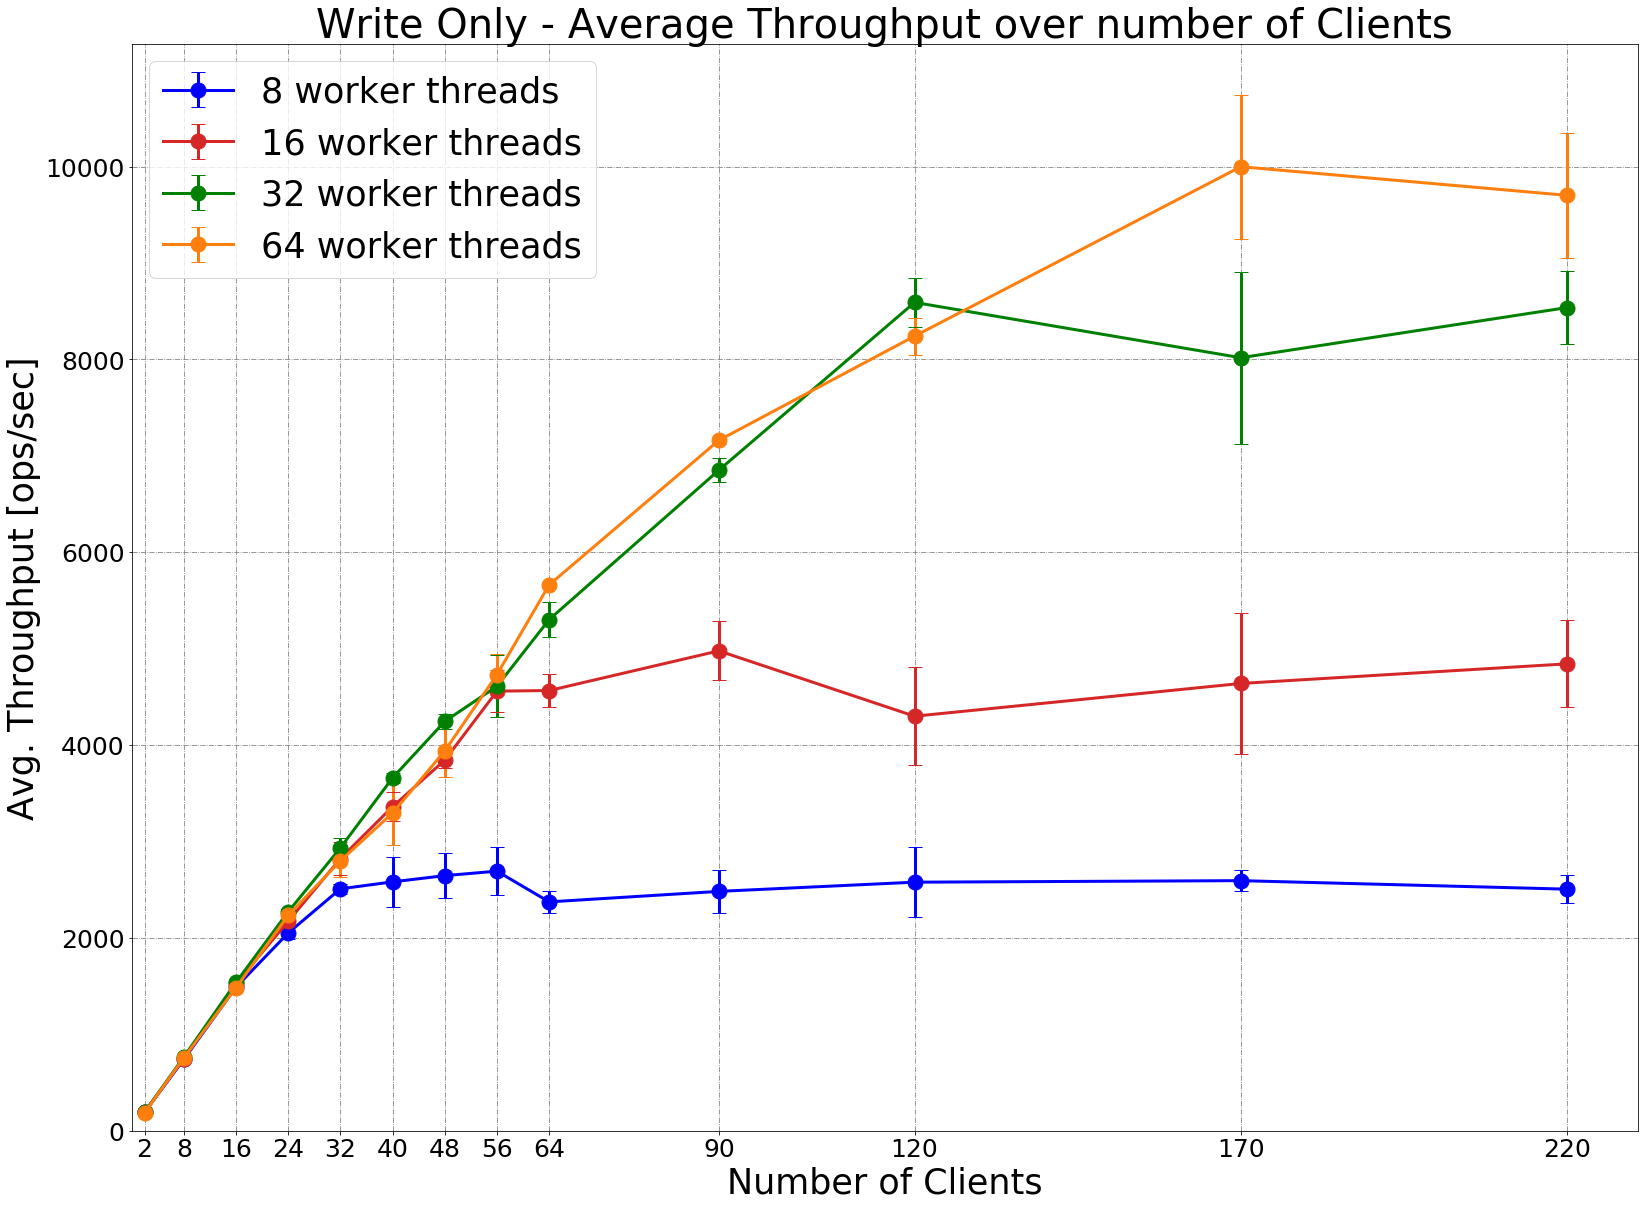

In [50]:
plt.show()

In [104]:
plt.figure(figsize=(40, 30))
plt.errorbar(numOfClients, latencyFinal[0], yerr=errLatencyFinal[0], fmt='-o',  linewidth=3.0, markersize = 15, label="8 worker threads", color="b", capsize=7)
plt.errorbar(numOfClients, latencyFinal[1], yerr=errLatencyFinal[1], fmt='-o',  linewidth=3.0, markersize = 15, label="16 worker threads", color="C3", capsize=7)
plt.errorbar(numOfClients, latencyFinal[2], yerr=errLatencyFinal[2], fmt='-o',  linewidth=3.0, markersize = 15, label="32 worker threads", color="g", capsize=7)
plt.errorbar(numOfClients, latencyFinal[3], yerr=errLatencyFinal[3], fmt='-o',  linewidth=3.0, markersize = 15, label="64 worker threads", color="C1", capsize=7)

plt.legend(loc=2, fontsize=35)
plt.title('Average Response Time over number of Clients', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. Response Time [msec]", fontsize= 35)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=25)
plt.yticks(np.arange(0, 105, 10), fontsize=25)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 102.94044197370353)

In [105]:
plt.savefig('/home/andrea/Desktop/Final/Baseline3Second/3.1/Get/ResponseTimeMemtier.png')

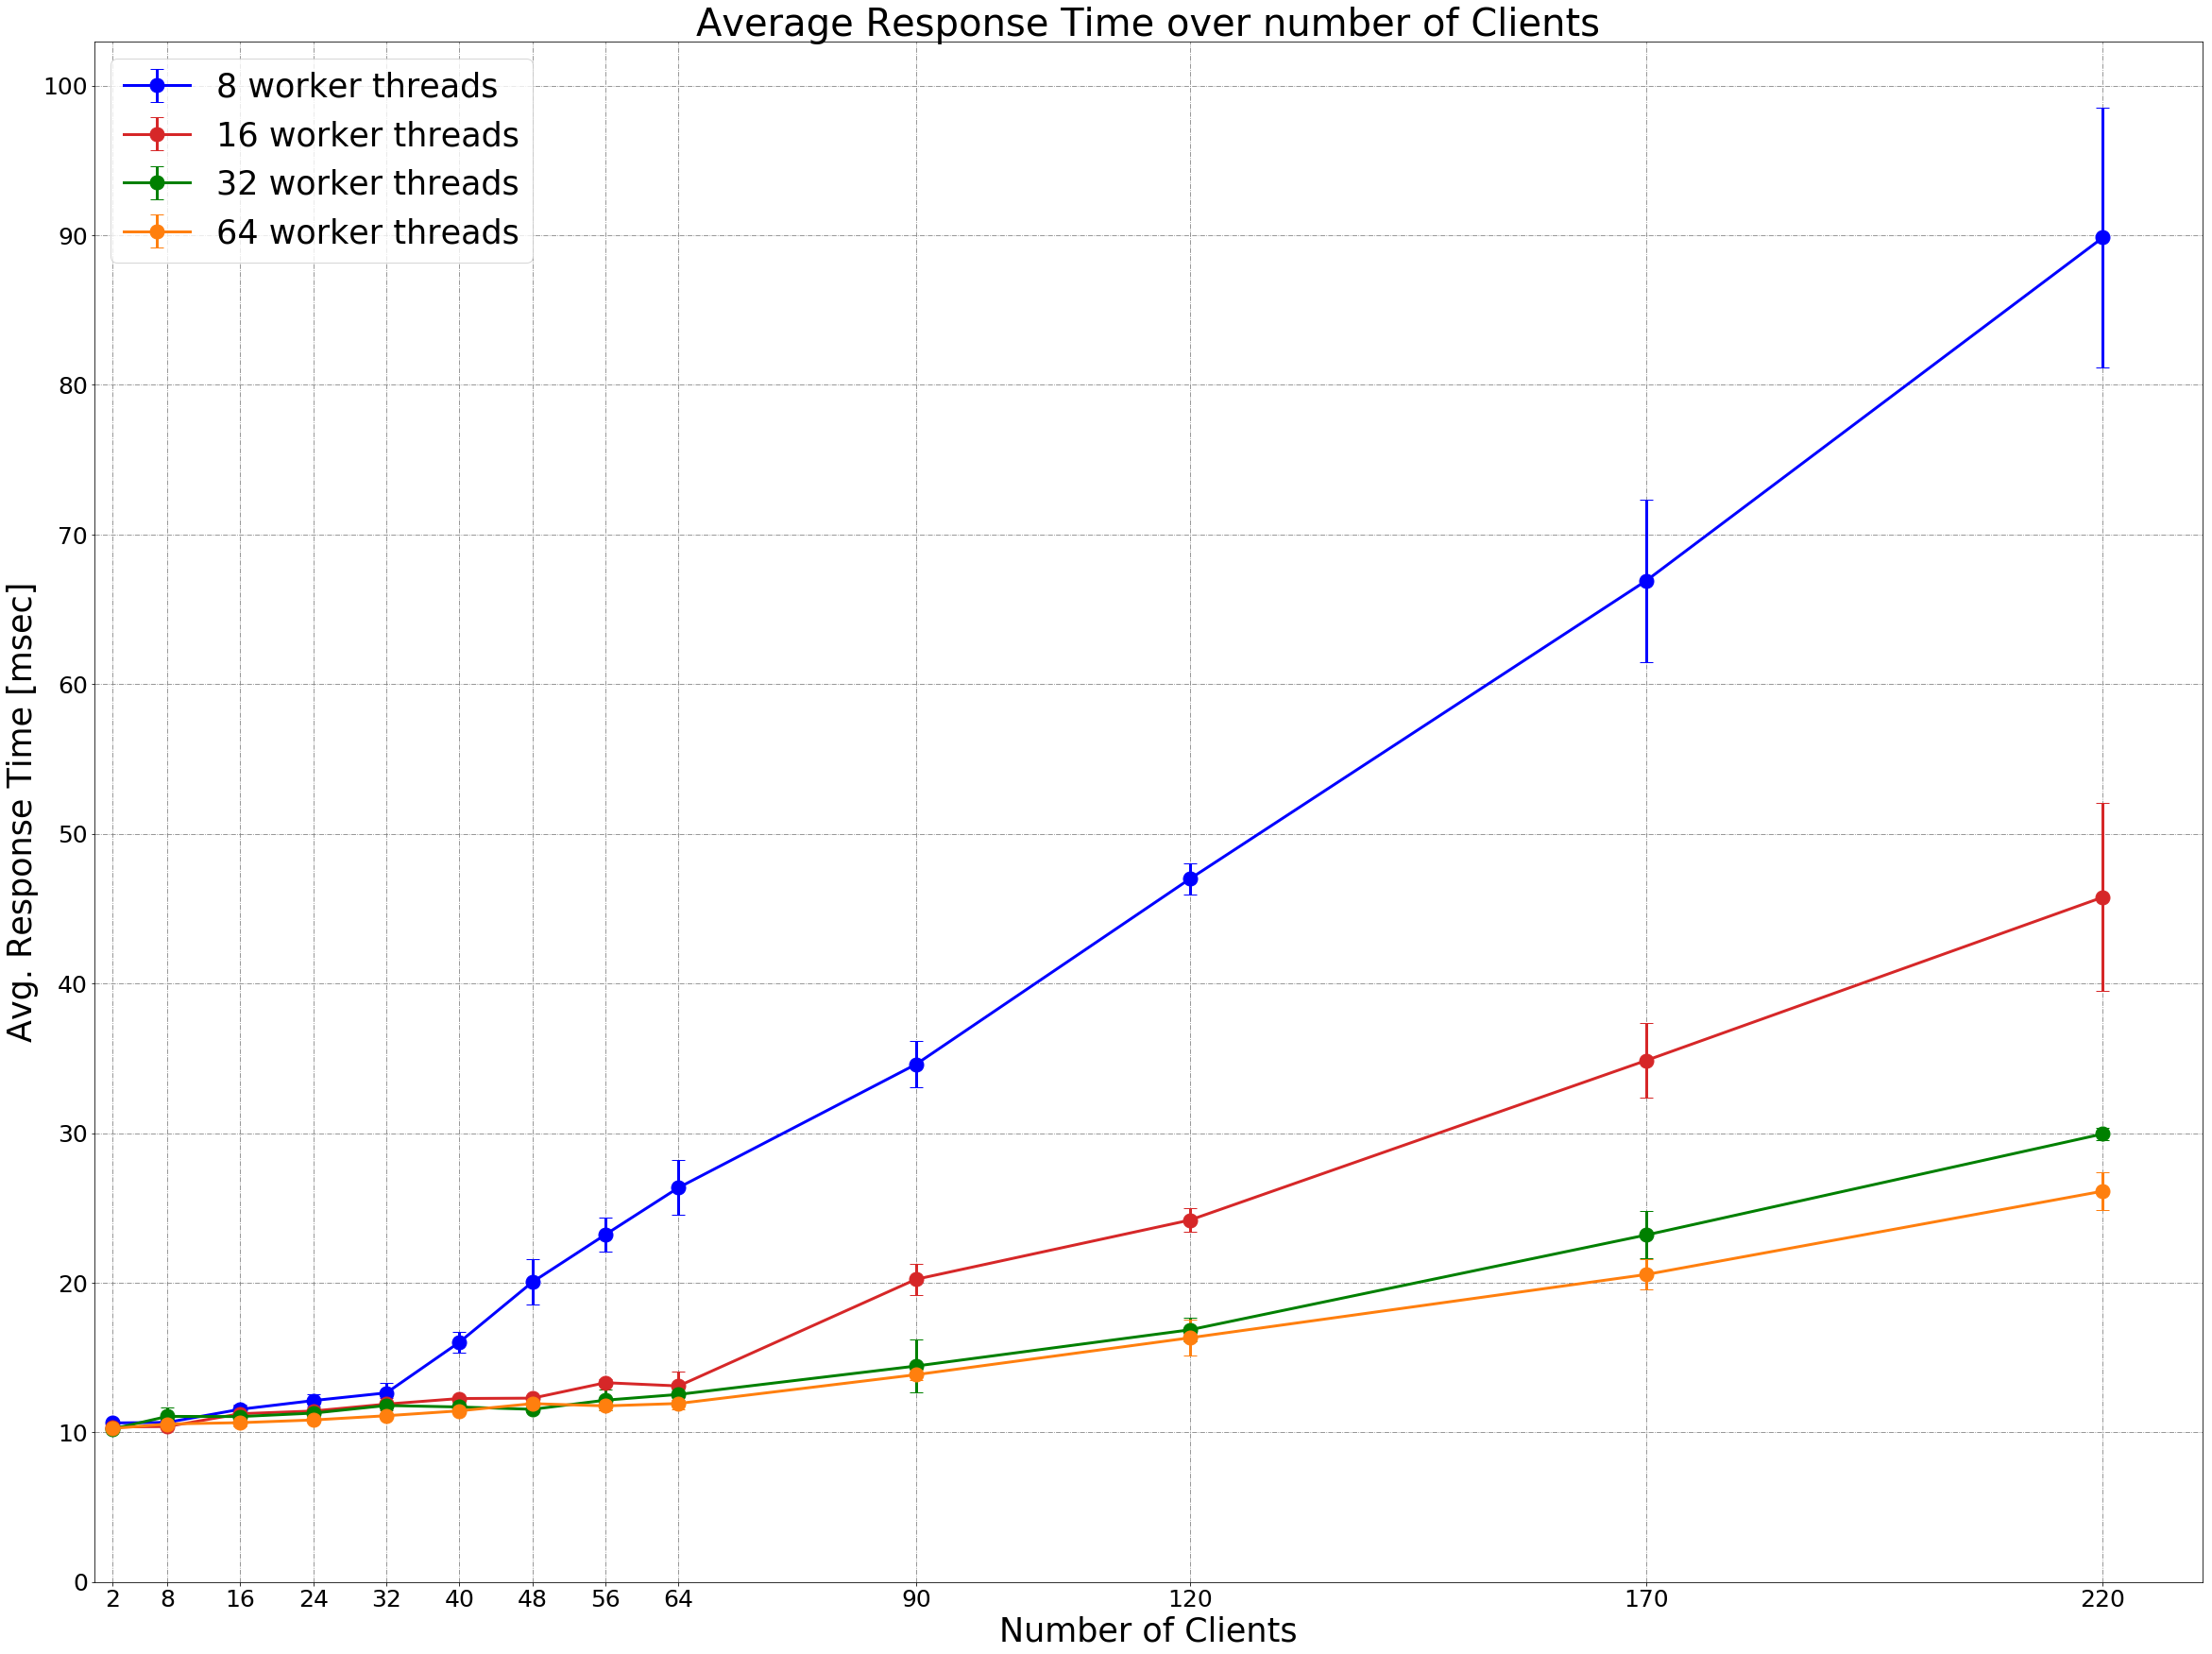

In [103]:
plt.show()